In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [54]:
#afisam data setul stars
df = pd.read_csv('Stars.csv')
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [55]:
# informatii despre coloane
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [56]:
# afisam valorile pentru Color
df['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Whitish                 2
yellowish               2
Orange                  2
Blue-White              1
Orange-Red              1
Yellowish               1
Pale yellow orange      1
White-Yellow            1
Name: Color, dtype: int64

In [57]:
df['Spectral_Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

In [58]:
# coloanel care au mai multe valori le inlocuim cu dummies variable
#stergem coloanele 
df = pd.get_dummies(df, columns=['Color','Spectral_Class'], drop_first=True)

In [59]:
df

,Temperature,L,R,A_M,Type,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,...,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# antrenam modelul de machine_learning, importam  logit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [61]:
# vedem rezultatel dupa Type
X = df.drop(['Type'], axis=1).values
y = df['Type'].values

In [62]:
# antrenam
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
logit = LogisticRegression(max_iter=10000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [64]:
logit.predict_proba(X_test)

array([[6.51634158e-055, 9.25640814e-012, 9.98441735e-001,
        1.55826512e-003, 1.22017364e-022, 3.03137325e-030],
       [9.99489337e-001, 5.10518787e-004, 2.57382975e-008,
        9.13696319e-010, 6.23886711e-008, 5.54686407e-008],
       [1.19701782e-015, 4.11538987e-003, 1.44743397e-001,
        8.51139331e-001, 1.86999565e-006, 1.27035123e-008],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        8.29246134e-046, 1.00000000e+000, 2.47610172e-025],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.00022988e-011, 9.99999998e-001, 1.93930025e-009],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 7.16640398e-028, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 7.33960467e-008, 9.99999927e-001],
       [1.59603849e-036, 1.60854613e-007, 9.95396694e-001,
        4.60314494e-003, 7.25195268e-016, 3.86500788e-021],
       [9.94605216e-001, 5.39264099e-003, 7.3930

In [65]:
y_pred = logit.predict(X_test)

In [66]:
# comparatia de acuratete
accuracy_score(y_pred, y_test)

0.9666666666666667

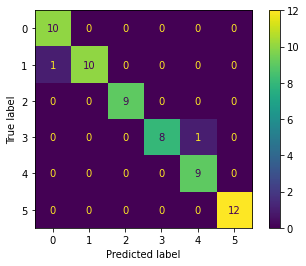

In [67]:
# matricea de confuzie
plot_confusion_matrix(logit, X_test, y_test)

In [78]:
# antrenam modelul de machine_learning, importam knn
from sklearn.neighbors import KNeighborsClassifier

In [79]:
# KNN, prezicerea - aflam valoarea medie a celor mai apropiati k vecini
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [80]:
y_pred

array([2, 0, 3, 4, 5, 5, 5, 2, 0, 2, 5, 2, 5, 4, 5, 4, 0, 1, 3, 1, 0, 0,
       4, 3, 4, 3, 1, 2, 4, 2, 3, 4, 2, 0, 0, 0, 0, 4, 1, 4, 5, 4, 5, 0,
       3, 0, 5, 3, 1, 1, 2, 0, 2, 1, 4, 2, 4, 2, 1, 1], dtype=int64)

In [81]:
# test accuracy
accuracy_score(y_pred, y_test)

0.65

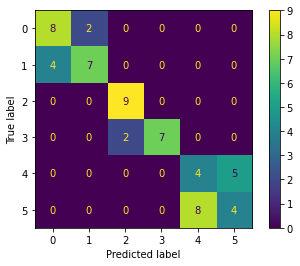

In [82]:
# matricea de confuzie
plot_confusion_matrix(knn, X_test, y_test)

In [73]:
# La Logit eroarea este 0.9666666666666667
# La KNN eroarea este 0.65
# reiese ca cel mai bun model este Logit